In [1]:
# project: p9
# submitter: zlweinstein
# partner: mhyoung3
# hours: 

In [2]:
import csv
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline

In [3]:
def plot_dict(d, label="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(label, fontsize=16)

In [4]:
def year_to_decade(year):
    if year % 10 == 0:
        decade_start = (year-9)
        decade_end = (year) #Complete this line/lines
    else:
        decade_start = year - (year % 10) + 1
        decade_end = decade_start + 9
        
    # you can either return here, or delete this return statement
    # and return above this line
    return (str(decade_start) + " to " + str(decade_end))

In [5]:
def median(items):
    sorted_list = sorted(items)
    length = int(len(sorted_list))
    if length % 2 != 0:
        return sorted_list[int((length-1)/2)]
    else:
        first_middle =  sorted_list[int((length)/2)]# use appropriate indexing
        second_middle = sorted_list[int((length-2)/2)] # use appropriate indexing
        median = (first_middle + second_middle) / 2
        return median

In [6]:
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

In [7]:
def get_mapping(path):
    mapping_rows = process_csv(path)
    mapping_dict = {}
    for i in range(len(mapping_rows)):
        col_val = mapping_rows[i][0]
        row_val = mapping_rows[i][1]
        if col_val not in mapping_dict:
            mapping_dict[col_val] = None
        if col_val in mapping_dict:
            mapping_dict[col_val] = row_val
            
    return mapping_dict

In [8]:
def get_raw_movies(path):
    """
    Converts movies csv list of lists data into a dict with keys as column names and values as corresponding type converted values.
    """
    # Task 2.1 and 2.3c of Lab-P8 have all the necessary steps to complete this function.
    # You just need to copy/paste the relevant code, identify the input and output of the function.
    csv_rows = process_csv(path)
    csv_header = csv_rows[0]
    csv_data = csv_rows[1:]
    final_movie_list = []
    for movie in range(len(csv_data)):

        movie_dict = {}
        for header in csv_header:
            movie_dict[header] = csv_data[movie][csv_header.index(header)]
            if header == "year" or header == "duration":
                movie_dict[header] = int(csv_data[movie][csv_header.index(header)])
            elif header == "rating":
                movie_dict[header] = float(csv_data[movie][csv_header.index(header)])
            elif header == "genres" or header == "directors" or header == "actors":
                new_list = csv_data[movie][csv_header.index(header)].split(", ")
                movie_dict[header] = new_list
            else:
                movie_dict[header] = csv_data[movie][csv_header.index(header)]
        final_movie_list.append(movie_dict)

    return final_movie_list

In [9]:
def get_movies(movies_path, mapping_path):

    raw_movies = get_raw_movies(movies_path)
    map_list = get_mapping(mapping_path)
    
    
    for movie in raw_movies:
        for j in range(len(movie["actors"])):
            movie["actors"][j] = map_list[movie["actors"][j]]
        for j in range(len(movie["directors"])):
            movie["directors"][j] = map_list[movie["directors"][j]]

        movie["title"] = map_list[movie["title"]]

    return raw_movies
def find_specific_movies(movies, keyword):
    '''given a list of movie dictionaries and a keyword,
    returns a list of movies that contains the keyword'''
    movies_new = list()
    for movie in movies:
        if (keyword in movie['title']) or (keyword in movie['genres']) \
            or (keyword in movie['directors']) or (keyword in movie['actors']):
            movies_new.append(movie)
    return movies_new

In [10]:
movies = get_movies("movies.csv", "mapping.csv")
movies[0]

{'title': 'They Live',
 'year': 1988,
 'genres': ['Action', 'Horror', 'Sci-Fi'],
 'duration': 94,
 'directors': ['John Carpenter'],
 'actors': ['Roddy Piper', 'Keith David', 'Meg Foster'],
 'rating': 7.3}

In [11]:
#Q1: What is the average rating of the 'Harry Potter' movies directed by 'David Yates'?
harry_potter = find_specific_movies(movies, "Harry Potter")
david_yates = find_specific_movies(harry_potter, "David Yates")
total = 0
for movie in david_yates:
    total += movie['rating']

average_rating = total / len(david_yates)
average_rating

7.725

In [12]:
#Q2: What is the median rating of all 'Ice Age' movies?
ice_age = find_specific_movies(movies, "Ice Age")
rating_list = []
for movie in ice_age:
    rating_list.append(movie["rating"])
    
median(rating_list)

6.8

In [13]:
#Q3: What are all the movies that have the lowest rating?
min_rating = None
for movie in movies:
    current_rating = movie['rating']
    if min_rating == None or current_rating <= min_rating:
        min_rating = current_rating
        
low_rating_list = []
for movie in movies:
    if movie['rating'] == min_rating:
        low_rating_list.append(movie)
        
low_rating_list

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [14]:
def max_rated_movies(movie_list):
    """
    Input: A list of movies.
    Return: A list of highest rated movies among the input list.
    """
    high_rating = 0
    for movie in movie_list:
        current_rating = movie['rating']
        if current_rating >= high_rating:
            high_rating = current_rating

    high_rated_movies = []
    for movie in movie_list:
        if movie['rating'] == high_rating:
            high_rated_movies.append(movie)

    return high_rated_movies

In [15]:
#Q4: Among all the 'Avengers' movies, which ones are highest rated?
avengers_movies = find_specific_movies(movies, 'Avengers')
max_rated_movies(avengers_movies)

[{'title': 'Avengers: Infinity War',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 149,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Hemsworth',
   'Mark Ruffalo',
   'Chris Evans',
   'Scarlett Johansson'],
  'rating': 8.4},
 {'title': 'Avengers: Endgame',
  'year': 2019,
  'genres': ['Action', 'Adventure', 'Drama'],
  'duration': 181,
  'directors': ['Anthony Russo', 'Joe Russo'],
  'actors': ['Robert Downey Jr.',
   'Chris Evans',
   'Mark Ruffalo',
   'Chris Hemsworth',
   'Scarlett Johansson'],
  'rating': 8.4}]

In [16]:
def bucketize(movie_list, category):
    """
    Input: A list of movies and a category string.
    Return: A dictionary that bucketizes `movie_list` by `category`.
    Requirements: See the instructions in README.md
    """
    bucket_dict = {}
    for movie in movie_list:
        categories = movie[category]
        if type(categories) == list:
            for item in categories:
                if item not in bucket_dict:
                    bucket_dict[item] = []
                if item in bucket_dict:
                    bucket_dict[item].append(movie)
        else:
            if categories not in bucket_dict:
                bucket_dict[categories] = []
            if categories in bucket_dict:
                bucket_dict[categories].append(movie)
    return bucket_dict

In [17]:
# Buceketize the full list of movies by their actors.
actors_buckets = bucketize(movies, 'actors')
# Buceketize the full list of movies by their directors.
directors_buckets = bucketize(movies, 'directors')
# Buceketize the full list of movies by their genre.
genre_buckets = bucketize(movies, 'genres')
genre_buckets['Crime']
# Buceketize the full list of movies by their year.
year_buckets = bucketize(movies, 'year')

In [18]:
#Q5: Which movies did 'Octavia Spencer' act in?
actors_buckets['Octavia Spencer']

[{'title': 'A Kid Like Jake',
  'year': 2018,
  'genres': ['Drama', 'Family'],
  'duration': 92,
  'directors': ['Silas Howard'],
  'actors': ['Claire Danes',
   'Jim Parsons',
   'Octavia Spencer',
   'Priyanka Chopra'],
  'rating': 5.4},
 {'title': 'Hidden Figures',
  'year': 2016,
  'genres': ['Biography', 'Drama', 'History'],
  'duration': 127,
  'directors': ['Theodore Melfi'],
  'actors': ['Taraji P. Henson', 'Octavia Spencer', 'Janelle Monáe'],
  'rating': 7.8},
 {'title': 'The Shape of Water',
  'year': 2017,
  'genres': ['Adventure', 'Drama', 'Fantasy'],
  'duration': 123,
  'directors': ['Guillermo del Toro'],
  'actors': ['Sally Hawkins',
   'Michael Shannon',
   'Richard Jenkins',
   'Octavia Spencer'],
  'rating': 7.3},
 {'title': 'Car Dogs',
  'year': 2016,
  'genres': ['Comedy', 'Drama'],
  'duration': 104,
  'directors': ['Adam Collis'],
  'actors': ['Octavia Spencer',
   'Alessandra Torresani',
   'Patrick J. Adams',
   'Nia Vardalos'],
  'rating': 5.0},
 {'title': 'Sm

In [19]:
#Q6: Which movies did 'George Takei' act in.
actors_buckets['George Takei']

[{'title': 'Ninja Cheerleaders',
  'year': 2008,
  'genres': ['Action', 'Comedy'],
  'duration': 81,
  'directors': ['David Presley'],
  'actors': ['Trishelle Cannatella',
   'Ginny Weirick',
   'Maitland McConnell',
   'George Takei'],
  'rating': 3.3},
 {'title': 'Live by the Fist',
  'year': 1993,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 77,
  'directors': ['Cirio H. Santiago'],
  'actors': ['Jerry Trimble', 'George Takei', 'Ted Markland'],
  'rating': 4.3},
 {'title': 'Free Birds',
  'year': 2013,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 91,
  'directors': ['Jimmy Hayward'],
  'actors': ['Owen Wilson', 'Woody Harrelson', 'Amy Poehler', 'George Takei'],
  'rating': 5.8}]

In [20]:
#Q7: How many movies are in each genre?
genre_frequencies = {}

for genre in genre_buckets:
    if genre not in genre_frequencies:
        genre_frequencies[genre] = 0
    if genre in genre_frequencies:
        for movie in genre:
            genre_frequencies[genre] = len(genre_buckets[genre])
            
genre_frequencies

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

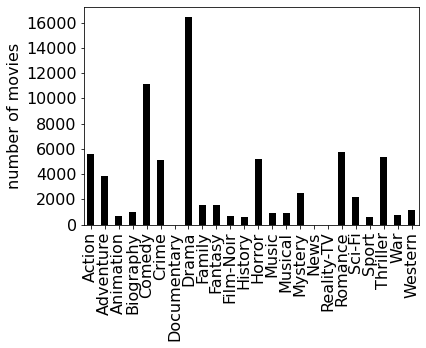

In [21]:
#Q8: Plot the number of movies in each genre as a bar graph.
plot_dict(genre_frequencies, 'number of movies')

In [22]:
#Q9: Find the number of movies released in each decade.
movies_decade = {}
for year in year_buckets:
    decade = year_to_decade(year)
    if decade not in movies_decade:
        movies_decade[decade] = 0
    if decade in movies_decade:
        movies_decade[decade] += len(year_buckets[year])

movies_decade

{'1981 to 1990': 2840,
 '2011 to 2020': 8884,
 '2001 to 2010': 6271,
 '1941 to 1950': 2256,
 '1971 to 1980': 1889,
 '1951 to 1960': 2201,
 '1931 to 1940': 2256,
 '1961 to 1970': 1609,
 '1991 to 2000': 4280,
 '1911 to 1920': 120,
 '1921 to 1930': 496}

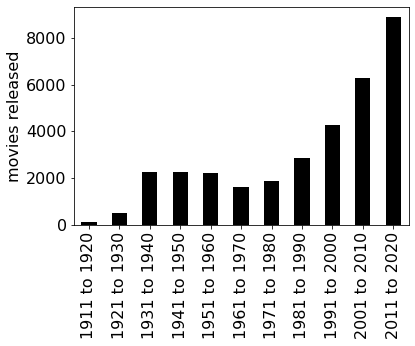

In [23]:
#Q10: Plot the number of movies released in each decade as a bar graph.
plot_dict(movies_decade, 'movies released')

In [24]:
#Q11: Find the highest rated movies for each genre.
high_rate_genre = {}
for genre in genre_buckets:
    if genre not in high_rate_genre:
        high_rate_genre[genre] = None
    if genre in high_rate_genre:
        high_rate_genre[genre] = max_rated_movies(genre_buckets[genre])

high_rate_genre

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [25]:
#Q12: Find the median rating of movies from each genre.
median_rating = {}
for genre in genre_buckets:
    rating_list = []
    for movie in genre_buckets[genre]:
        current_rating = movie["rating"]
        rating_list.append(current_rating)
    if genre not in median_rating:
        median_rating[genre] = None
    if genre in median_rating:
        median_rating[genre] = median(rating_list)
median_rating
    

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

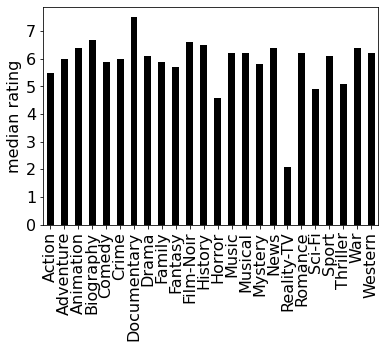

In [26]:
#Q13: Plot the median ratings of movies in each genre as a bar graph.
plot_dict(median_rating, "median rating")

In [27]:
#Q14: Produce a list of genres sorted in decreasing order of their median rating.
ratings = dict(sorted(median_rating.items(), key=lambda r:r[1], reverse=True))
list(ratings.keys())

['Documentary',
 'Biography',
 'Film-Noir',
 'History',
 'War',
 'Animation',
 'News',
 'Romance',
 'Western',
 'Music',
 'Musical',
 'Drama',
 'Sport',
 'Crime',
 'Adventure',
 'Comedy',
 'Family',
 'Mystery',
 'Fantasy',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Reality-TV']

In [28]:
#Q15: Produce a list of Shrek movies sorted in increasing order of their year of release.
shrek_movies = find_specific_movies(movies,"Shrek")
sorted_shrek = list(sorted(shrek_movies, key=lambda movie: movie["year"]))
sorted_shrek

[{'title': 'Shrek',
  'year': 2001,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 90,
  'directors': ['Andrew Adamson', 'Vicky Jenson'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.8},
 {'title': 'Shrek 2',
  'year': 2004,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Andrew Adamson', 'Kelly Asbury'],
  'actors': ['Mike Myers', 'Eddie Murphy'],
  'rating': 7.2},
 {'title': 'Shrek the Third',
  'year': 2007,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Chris Miller', 'Raman Hui'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.1},
 {'title': 'Shrek Forever After',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 93,
  'directors': ['Mike Mitchell'],
  'actors': ['Mike Myers', 'Eddie Murphy', 'Cameron Diaz', 'Antonio Banderas'],
  'rating': 6.3},
 {'title': 'Shrek the Musical',
  'year': 2013,
  'genre

In [29]:
#Q16: Find a list of all movies in which 'Jodie Foster' is both an actor and director.
jodie_act_dir = []
jodie_movies = actors_buckets["Jodie Foster"]
# for movie in jodie_movies:
#     director = movie["directors"]
#     if "Jodie Foster" in director:
#         jodie_act_dir.append(movie)
# jodie_act_dir
[movie for movie in jodie_movies if "Jodie Foster" in movie["directors"]]

[{'title': 'Little Man Tate',
  'year': 1991,
  'genres': ['Drama'],
  'duration': 99,
  'directors': ['Jodie Foster'],
  'actors': ['Jodie Foster', 'Alex Lee', 'Adam Hann-Byrd'],
  'rating': 6.6}]

In [30]:
#Q17: What is the title of the longest movie both acted and directed by 'Clint Eastwood'?
eastwood_act = actors_buckets["Clint Eastwood"]
eastwood_both = [movie for movie in eastwood_act if "Clint Eastwood" in movie["directors"]]
longest_movie_title = None
longest_movie_min = 0
for movie in eastwood_both:
    current_title = movie["title"]
    current_length = movie["duration"]
    if current_length > longest_movie_min:
        longest_movie_min = current_length
        longest_movie_title = current_title
longest_movie_title

'A Perfect World'

[{'title': 'The Matrix Reloaded',
  'year': 2003,
  'genres': ['Action', 'Sci-Fi'],
  'duration': 138,
  'directors': ['Lana Wachowski', 'Lilly Wachowski'],
  'actors': ['Ray Anthony', 'Helmut Bakaitis', 'Steve Bastoni'],
  'rating': 7.2},
 {'title': 'Jupiter Ascending',
  'year': 2015,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 127,
  'directors': ['Lana Wachowski', 'Lilly Wachowski'],
  'actors': ['Mila Kunis', 'Channing Tatum', 'Sean Bean', 'Eddie Redmayne'],
  'rating': 5.3},
 {'title': 'Bound',
  'year': 1996,
  'genres': ['Crime', 'Romance', 'Thriller'],
  'duration': 109,
  'directors': ['Lana Wachowski', 'Lilly Wachowski'],
  'actors': ['Jennifer Tilly', 'Gina Gershon', 'Joe Pantoliano'],
  'rating': 7.3},
 {'title': 'Cloud Atlas',
  'year': 2012,
  'genres': ['Action', 'Drama', 'Mystery'],
  'duration': 172,
  'directors': ['Tom Tykwer', 'Lana Wachowski'],
  'actors': ['Tom Hanks', 'Halle Berry', 'Jim Broadbent', 'Hugo Weaving'],
  'rating': 7.4},
 {'title': 

In [43]:
#Q18: What are the titles of the movies directed by the Wachowskis contain both 'Action' 
#and 'Adventure' in their genre?

Wachowski_movies = directors_buckets['Lana Wachowski'] 
Wachowski_movies.append(directors_buckets['Lilly Wachowski'])
wach_movies = []
for movie in Wachowski_movies:
#     current_movie_genre = movie["genres"]
#     if "Action" in current_movie_genre and "Adventure" in current_movie_genre:
#         wach_movies.append(movie)
# wach_movies
        